# Stochastic Modelling of Cryptocurrency Network Adoption*

#### * shared with the consent of project owner

In [267]:
# Standard Library Imports
import math
import pandas as pd
import numpy as np
import scipy as sp
from scipy.ndimage import gaussian_filter1d
from scipy.stats import norm

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

%matplotlib inline

## Dataset Import
Currently, only ethereum network is used for modelling.

In [268]:
gas_price = pd.read_csv('data/ethereum/AvgGasPrice.csv')
gas_used = pd.read_csv('data/ethereum/GasUsed.csv')
n_transactions = pd.read_csv('data/ethereum/TxGrowth.csv')


In [269]:
gas_price.columns = ['Date', 'TimeStamp', 'Value']
gas_used.columns = ['Date', 'TimeStamp', 'Value']
n_transactions.columns = ['Date', 'TimeStamp', 'Value']

gas_price.head()


,Date,TimeStamp,Value
0,7/30/2015,1438214400,0
1,7/31/2015,1438300800,0
2,8/1/2015,1438387200,0
3,8/2/2015,1438473600,0
4,8/3/2015,1438560000,0


In [270]:
gas_price.Date = pd.to_datetime(gas_price.Date, format = '%m/%d/%Y')
gas_used.Date = pd.to_datetime(gas_used.Date, format = '%m/%d/%Y')
n_transactions.Date = pd.to_datetime(n_transactions.Date, format = '%m/%d/%Y')

gas_price.head()

,Date,TimeStamp,Value
0,2015-07-30,1438214400,0
1,2015-07-31,1438300800,0
2,2015-08-01,1438387200,0
3,2015-08-02,1438473600,0
4,2015-08-03,1438560000,0


### ADD EVERY TICKER NAME HERE!

In [271]:
# order in both lists MUST MATCH
tickers=['gas_price','gas_used', 'n_transactions']  
df_names = [gas_price,  gas_used, n_transactions] 
print(df_names)

[           Date   TimeStamp         Value
0    2015-07-30  1438214400             0
1    2015-07-31  1438300800             0
2    2015-08-01  1438387200             0
3    2015-08-02  1438473600             0
4    2015-08-03  1438560000             0
5    2015-08-04  1438646400             0
6    2015-08-05  1438732800             0
7    2015-08-06  1438819200             0
8    2015-08-07  1438905600  604684154870
9    2015-08-08  1438992000  322713574989
10   2015-08-09  1439078400  475467129048
11   2015-08-10  1439164800  421654904254
12   2015-08-11  1439251200   77838819162
13   2015-08-12  1439337600  444902379011
14   2015-08-13  1439424000  268683475202
15   2015-08-14  1439510400  193455494453
16   2015-08-15  1439596800  144368937208
17   2015-08-16  1439683200  120940093311
18   2015-08-17  1439769600  132149993345
19   2015-08-18  1439856000  146513014268
20   2015-08-19  1439942400  194583349948
21   2015-08-20  1440028800   99011782801
22   2015-08-21  1440115200   795

### Set START DATE AND END DATE OF ANALYSIS

In [272]:
# Y , M , D
start = dt.datetime(2015, 7, 30)


#Enter a specific date or today
end = dt.datetime(2018, 12, 31)

#end = dt.date.today()
print(start)

2015-07-30 00:00:00


Make a dataframe starts and ends at Time specified, date as index, and columns the close price of assets in question

In [273]:
df = pd.DataFrame()

df['Date'] = pd.to_datetime([start + dt.timedelta(days=x) for x in range(0, (end-start).days)], format = '%Y/%m/%d')

# df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
# df = df[df.Date  >= start ]
df = df.set_index('Date')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('Date').Value.rename(tickers[count]))

In [274]:
df.head(10)

,gas_price,gas_used,n_transactions
Date,,,
2015-07-30,0,0,8893
2015-07-31,0,0,0
2015-08-01,0,0,0
2015-08-02,0,0,0
2015-08-03,0,0,0
2015-08-04,0,0,0
2015-08-05,0,0,0
2015-08-06,0,0,0
2015-08-07,604684154870,49353826,2050


### Daily Percent Change
#### daily_df is a dataframe of daily returns

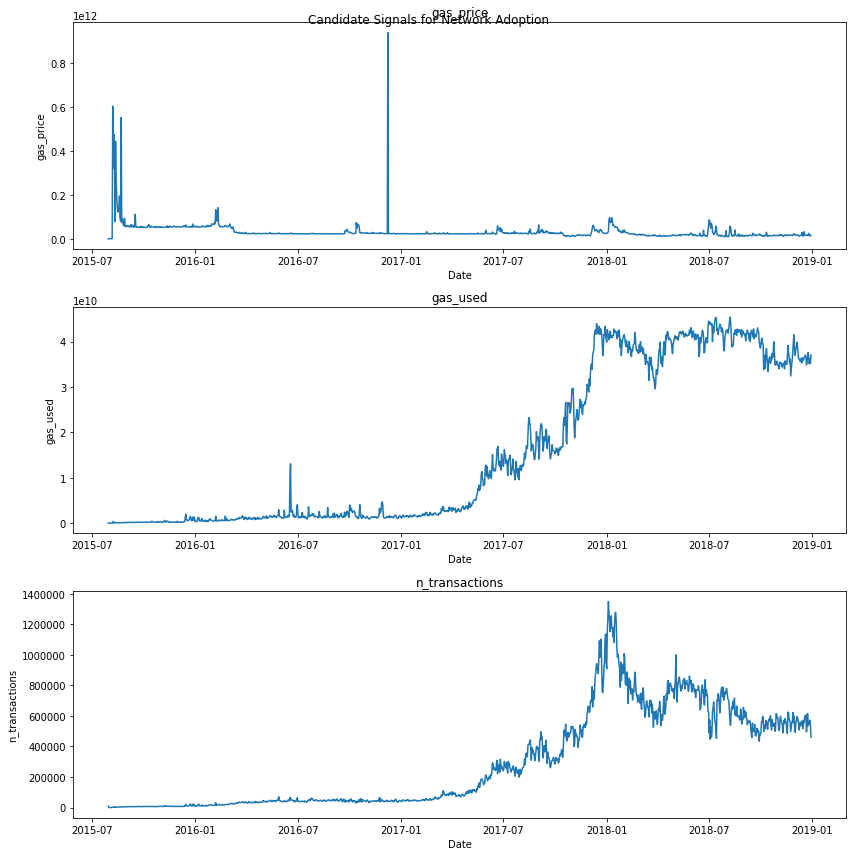

In [275]:
plt.figure(figsize=(12,12))
plt.suptitle('Candidate Signals for Network Adoption')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),1,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel(name)

plt.tight_layout()

/Users/hamedlayeghi/Work/General/Python/Python3.7-x64_Anaconda-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


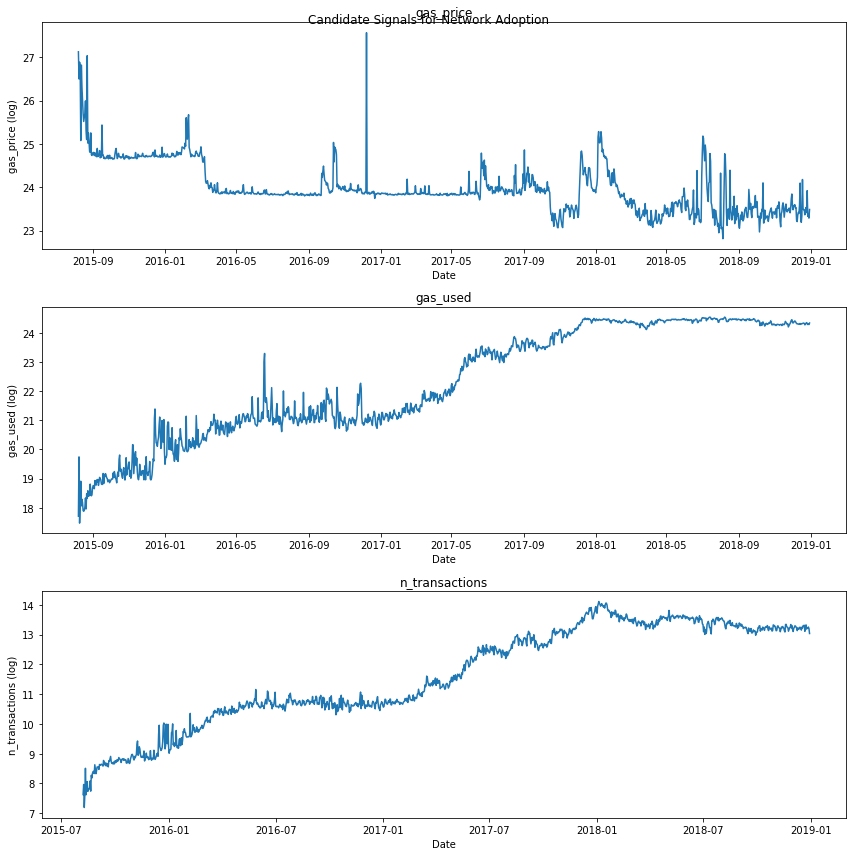

In [276]:
plt.figure(figsize=(12,12))
plt.suptitle('Candidate Signals for Network Adoption')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),1,count+1)
    plt.plot(df.index, np.log(df[name])) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel(name+' (log)')

plt.tight_layout()

# Regression

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            868, 869, 870, 871, 872, 873, 874, 875, 876, 877],
           dtype='int64', name='Date', length=878)


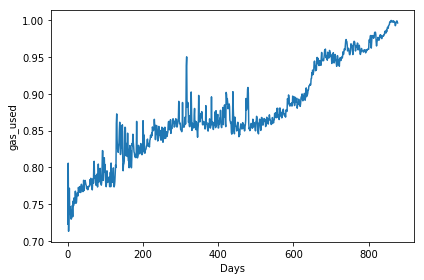

In [277]:
c = 'gas_used'

start_new = pd.Timestamp(2015,8,7)
end_new = pd.Timestamp(2017,12,31)
df_new = df[(start_new<=df.index) & (df.index<=end_new)]

X = (df_new.index - start_new).days
Y = np.log(df_new[c].values)
Y = Y/max(Y)

plt.plot(X,Y)
plt.xlabel('Days')
plt.ylabel(c)
plt.tight_layout();
print(X)

In [278]:
print(str(len(Y)), str(len(X)))

878 878


slope = 0.00023825758480799708, intercept = 0.7702545314392375


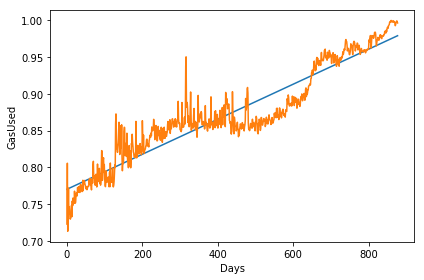

In [279]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
Y_hat = slope * X + intercept
plt.plot(X, Y_hat)
plt.plot(X, Y)
plt.xlabel('Days')
plt.ylabel('GasUsed')
plt.tight_layout()

print('slope = %s, intercept = %s' % (str(slope), str(intercept)))

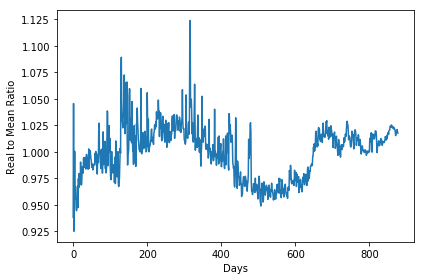

In [280]:
error = Y / Y_hat
plt.plot(X, error)
plt.xlabel('Days')
plt.ylabel('Real to Mean Ratio')
plt.tight_layout()

# Smoothing with Gaussian Kernel

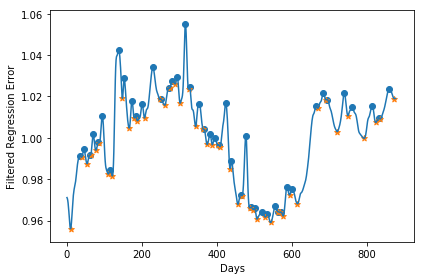

In [281]:
error_filtered = gaussian_filter1d(error, 3)
margin = 0
local_max = np.r_[False, error_filtered[1:] > (error_filtered[:-1]+margin)] & np.r_[(error_filtered[:-1]-margin)\
                                                                                   > error_filtered[1:], False]
local_max_indices = np.where(local_max == True)
local_max_indices = local_max_indices[0]
local_min = np.r_[False, error_filtered[1:] < (error_filtered[:-1]-margin)] & np.r_[(error_filtered[:-1]+margin)\
                                                                                   < error_filtered[1:], False]
local_min_indices = np.where(local_min == True)
local_min_indices = local_min_indices[0]
# plot
plt.plot(X, error_filtered)
plt.scatter(local_max_indices, error_filtered[local_max_indices])
plt.scatter(local_min_indices, error_filtered[local_min_indices],marker='*')

plt.xlabel('Days')
plt.ylabel('Filtered Regression Error')
plt.tight_layout()


[ 10  39  54  63  77  86 110 121 148 166 180 188 207 248 261 274 289 302
 325 343 364 374 388 402 408 435 456 467 488 497 507 529 544 563 568 577
 594 615 669 692 721 750 793 824 836 874  35  45  61  70  84  94 116 138
 153 173 183 201 229 250 271 281 294 316 327 352 366 382 394 405 424 439
 464 477 491 501 521 535 556 564 571 587 601 665 684 695 740 761 815 832
 860]


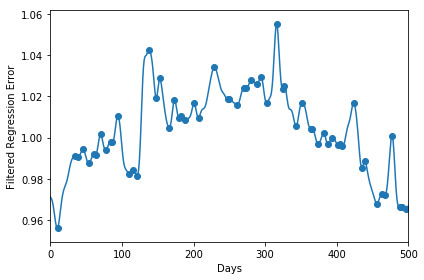

In [282]:
local_extremum_indices = np.concatenate((local_min_indices, local_max_indices))
print(local_extremum_indices)
local_extremum_indices= np.sort(local_extremum_indices, kind='mergesort')
# plot
plt.plot(X, error_filtered)
plt.scatter(local_extremum_indices, error_filtered[local_extremum_indices])
plt.xlim(0,500)
plt.xlabel('Days')
plt.ylabel('Filtered Regression Error')
plt.tight_layout()

# Developing the stochastic model

### Interarrival times

[25  4  6  9  7  2  7  7  7  2  8 16  6  5 17 10  5 13  7  7  3  5 13  6
 22 19  2 11 10  3  7  8  5  8 14  9  2 16  9 12  2  8  8  6  6  8  3  3
 16 11  4 17  8  3 10 11  3  6  4  6 14  8  6  9 12  7  1  4  3  6 10  7
  7 14 50  4 15  8  3 26 19 10 11 32 22  9  8  4 24 14] 0.10416666666666667


Text(20.875, 0.5, 'Frequency')

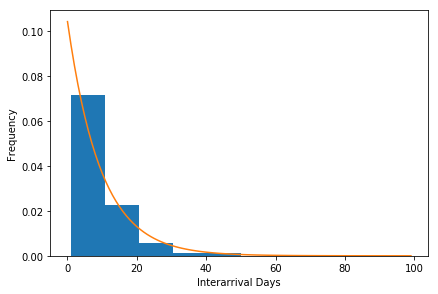

In [283]:
arrival_times = np.diff(local_extremum_indices)
lambda_hat = 1/np.mean(arrival_times)
print(arrival_times, lambda_hat)
plt.hist(arrival_times, bins =5, density =True)
x = np.arange(100)
plt.plot(x, lambda_hat*np.exp(-lambda_hat*x))
plt.tight_layout()
plt.xlabel('Interarrival Days')
plt.ylabel('Frequency')

### Spike Magnitudes

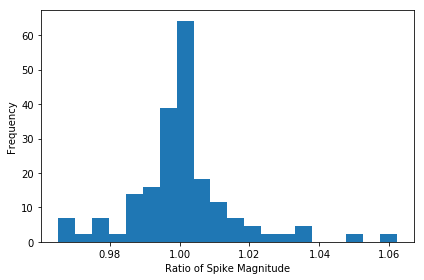

In [284]:
local_extrema = error_filtered[local_extremum_indices]
spike_magnitudes = local_extrema[1:]/local_extrema[:-1]
plt.hist(spike_magnitudes, bins=20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Ratio of Spike Magnitude')
plt.tight_layout()

maximum growth rate: 3.0919468995062718 times standard deviation
-4.8316421292355e-06 0.0011479527780770898


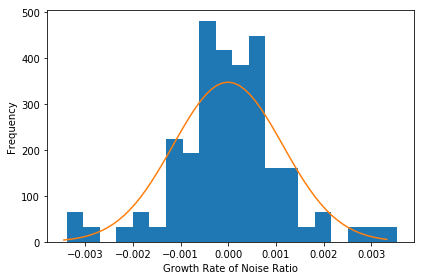

In [285]:
growth = np.log(spike_magnitudes)/arrival_times
mu_growth = np.mean(growth)
var_growth = np.var(growth)
std_growth = np.sqrt(var_growth)
plt.hist(growth, bins=20, density=True)
print('maximum growth rate: %s times standard deviation' % str(max(abs(growth))/std_growth))
range_factor = 3
x = np.arange(mu_growth - range_factor * std_growth, mu_growth +range_factor *std_growth, std_growth/10)
plt.plot(x, norm.pdf(x, loc=mu_growth, scale=std_growth))
plt.ylabel('Frequency')
plt.xlabel('Growth Rate of Noise Ratio')
plt.tight_layout()

print(mu_growth, std_growth)

# Random Generator Class for Network Adoption

In [286]:
def update_mean_ema(mu_p, x_n, alpha):
    return alpha * x_n + (1-alpha) * mu_p


class PoissonWithExponentialJumpSignalGenerator:
    def __init__(self, slope_log=0.0002382576, intercept_log=0.770254531, max_log_adoption=1, lambda_event=0.10417, \
                 mu_noise_log=-4.8316e-06, std_noise_log=0.00115, max_noise_ratio_growth_rate = 3.1, rng_seed=None, 
                 return_contraction_threshold = None, return_contraction_ema_alpha = None, 
                 return_contraction_const = None
                ):
        self._rng = np.random.RandomState(seed=rng_seed)
        self._slope_log = slope_log
        self._intercept_log = intercept_log
        self._max_log_adoption = max_log_adoption
        self._start_noise_ratio = 1.0
        self._time_last_event = 0
        self._lambda_event = lambda_event
        self._time_next_event = int(np.random.exponential(scale = 1/self._lambda_event))
        self._direction = 1
        self._mu_noise_log = mu_noise_log
        self._std_noise_log = std_noise_log
        self._max_noise_ratio_growth_rate = max_noise_ratio_growth_rate
        self._noise_ratio_growth_rate = self._direction*abs(np.random.normal(loc=mu_noise_log, scale=std_noise_log))
        self._average_log_adoption = None
        self._adoption = None
        self._return_ema = 0.0
        self._adoption = math.exp(intercept_log)
        if (return_contraction_threshold is not None) or (return_contraction_ema_alpha is not None) or (return_contraction_ema_alpha is not None):
            assert return_contraction_threshold is not None, "missing value for return_contraction_threshold"
            assert return_contraction_ema_alpha is not None, "missing value for return_contraction_ema_alpha"
            assert return_contraction_const is not None, "missing value for return_contraction_threshold"
        self._return_contraction_threshold = return_contraction_threshold
        self._return_contraction_const = return_contraction_const
        self._return_contraction_ema_alpha = return_contraction_ema_alpha

    
    def _update_adoption(self):
        self._adoption = math.exp(self._noise_ratio * self._average_log_adoption)
        assert self._adoption >= 0, "adoption cannot be negative"
        
    def _update_average_adoption(self, time: float):
        x = self._slope_log * time + self._intercept_log
        self._average_log_adoption = min(x, self._max_log_adoption)
    
    def _update_noise_ratio(self, time: float):
        self._noise_ratio = self._start_noise_ratio*math.exp(self._noise_ratio_growth_rate*(time-self._time_last_event))
        # print('noise_ratio_growth_rate = %s' % str(self._noise_ratio_growth_rate))
        # print('noise_ratio = %s' % str(self._noise_ratio))
    
    def _update_event(self, time: float):
#         print('time = %s and time_from_last = %s' % (str(time),str(time-self._time_last_event)))
        if (time-self._time_last_event) >= self._time_next_event:
            t_tmp = self._time_next_event
            self._time_next_event = int(np.random.exponential(scale = 1/self._lambda_event))+1
            self._time_last_event = time
            self._direction *= -1
            self._start_noise_ratio = self._noise_ratio
            self._noise_ratio_growth_rate = self._direction*np.clip(abs(self._rng.normal(loc=self._mu_noise_log, \
                                                    scale=self._std_noise_log)), 0, \
                                                    self._max_noise_ratio_growth_rate*self._std_noise_log)
        if self._return_contraction_threshold is not None:
            # contraction
            if self._return_ema > self._return_contraction_threshold:
                _delta = self._return_ema - self._return_contraction_threshold
                # print(f"compressing at time {time}: delta = ", _delta)
                self._noise_ratio_growth_rate -=  self._return_contraction_const * _delta**2
                # print("_noise_ratio_growth_rate = ", self._noise_ratio_growth_rate)
            # print("t_next = %s" % str(self._time_next_event))
            if self._return_ema < - self._return_contraction_threshold:
                _delta = self._return_ema + self._return_contraction_threshold
                # print(f"compressing at time {time}: delta = ", _delta)
                self._noise_ratio_growth_rate += self._return_contraction_const * _delta**2
                # print("_noise_ratio_growth_rate = ", self._noise_ratio_growth_rate)
            # print("t_next = %s" % str(self._time_next_event))
    
    def update_adoption(self, time: float):
        prev_adoption = self._adoption 
        # print('average_adoption before = %s at t = %s '% (str(self._average_log_adoption), str(time)))

        self._update_average_adoption(time)
        # print('average_adoption after = %s' %str(self._average_log_adoption))

        self._update_noise_ratio(time)
        
        self._update_adoption()
        # print('adoption = %s' %str(self._adoption))

        self._update_event(time)
        
        if self._return_contraction_ema_alpha is not None:
            _return = (self._adoption - prev_adoption) / prev_adoption
            self._return_ema = update_mean_ema(self._return_ema, _return, self._return_contraction_ema_alpha)
        # print("return: ", self._return_ema)
        
        return self
        
    def get_signal(self):
        return self._adoption
        
     

In [287]:
syn_data_x = np.arange(int(np.max(X.values)) + 1)

N = 8
syn_data_y = []
for j in range(N):
    print(f"Starting run {j}\n=======================")
    gen = PoissonWithExponentialJumpSignalGenerator(rng_seed=np.random.randint(low=0, high=2**32-1))
    syn_data_y.append(np.array([gen.update_adoption(i).get_signal() for i in syn_data_x]))
    print("")
    
# print(syn_data_y)

Starting run 0

Starting run 1

Starting run 2

Starting run 3

Starting run 4

Starting run 5

Starting run 6

Starting run 7



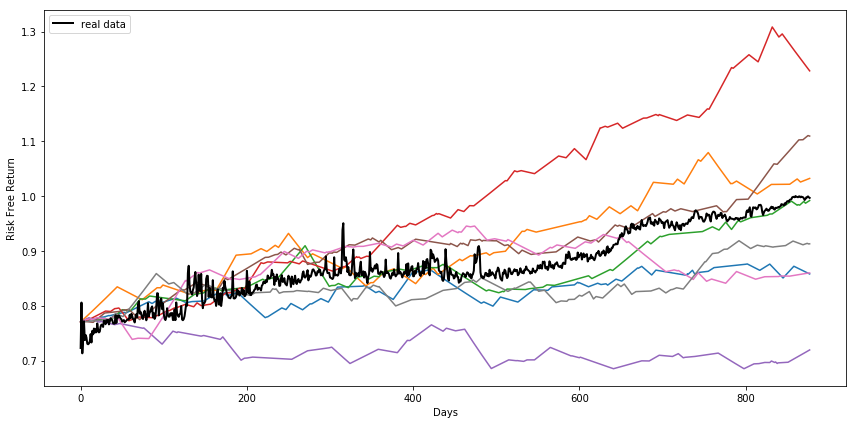

In [288]:
real_normalized_price = np.log(df_new[c].values)
real_normalized_price /= max(real_normalized_price)

plt.figure(figsize=(12,6));
for _r, _y in enumerate(syn_data_y):
    plt.plot(syn_data_x, np.log(_y))
plt.plot(X, real_normalized_price, label = 'real data', linewidth=2, color="black")
# plt.plot(min[X], max[X])
plt.xlabel('Days')
plt.ylabel('Risk Free Return')
plt.legend()
# plt.ylim(0, 1e-4)
plt.tight_layout();

# Number of Transactions

## Regression

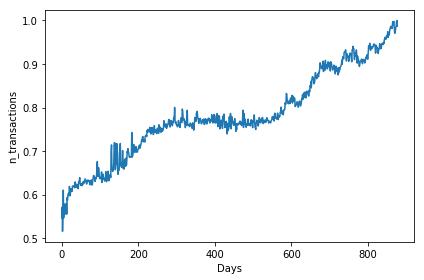

In [289]:
c = 'n_transactions'

start_new = pd.Timestamp(2015,8,7)
end_new = pd.Timestamp(2017,12,31)
df_new = df[(start_new<=df.index) & (df.index<=end_new)]

X = (df_new.index - start_new).days
Y = np.log(df_new[c].values)
Y = Y/max(Y)

plt.plot(X,Y)
plt.xlabel('Days')
plt.ylabel(c)
plt.tight_layout()



In [290]:
print(str(len(Y)), str(len(X)))

878 878


slope_log = 0.0003811951192898479, intercept_log = 0.6134434756157009


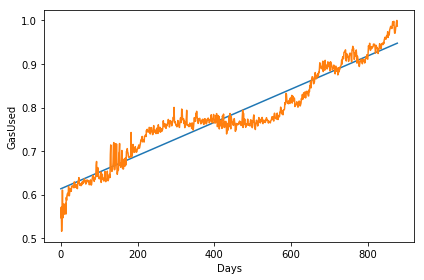

In [291]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
Y_hat = slope * X + intercept
plt.plot(X, Y_hat)
plt.plot(X, Y)
plt.xlabel('Days')
plt.ylabel('GasUsed')
plt.tight_layout()

print('slope_log = %s, intercept_log = %s' % (str(slope), str(intercept)))

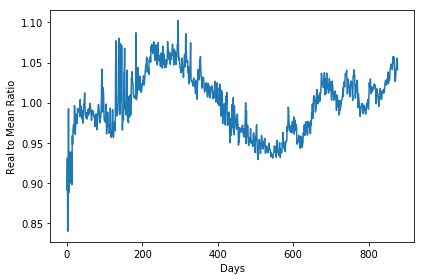

In [292]:
error = Y / Y_hat
plt.plot(X, error)
plt.xlabel('Days')
plt.ylabel('Real to Mean Ratio')
plt.tight_layout()

## Smoothing with Gaussian Kernel

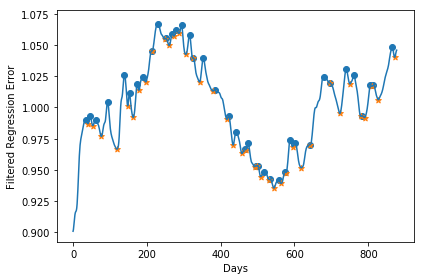

In [293]:
error_filtered = gaussian_filter1d(error, 3)
margin = 0
local_max = np.r_[False, error_filtered[1:] > (error_filtered[:-1]+margin)] & np.r_[(error_filtered[:-1]-margin)\
                                                                                   > error_filtered[1:], False]
local_max_indices = np.where(local_max == True)
local_max_indices = local_max_indices[0]
local_min = np.r_[False, error_filtered[1:] < (error_filtered[:-1]-margin)] & np.r_[(error_filtered[:-1]+margin)\
                                                                                   < error_filtered[1:], False]
local_min_indices = np.where(local_min == True)
local_min_indices = local_min_indices[0]
# plot
plt.plot(X, error_filtered)
plt.scatter(local_max_indices, error_filtered[local_max_indices])
plt.scatter(local_min_indices, error_filtered[local_min_indices],marker='*')

plt.xlabel('Days')
plt.ylabel('Filtered Regression Error')
plt.tight_layout()


[ 40  53  77 119 148 163 178 197 214 248 260 273 287 305 325 343 379 417
 434 458 468 492 498 508 532 544 564 577 595 619 642 695 723 750 780 790
 810 827 872  34  46  61  94 139 153 174 189 213 230 251 269 280 294 316
 326 353 384 422 442 465 474 496 501 518 534 557 574 588 601 641 679 696
 740 761 783 806 814 865]


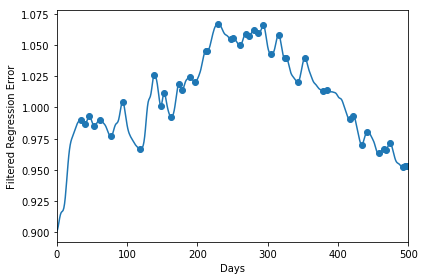

In [294]:
local_extremum_indices = np.concatenate((local_min_indices, local_max_indices))
print(local_extremum_indices)
local_extremum_indices= np.sort(local_extremum_indices, kind='mergesort')
# plot
plt.plot(X, error_filtered)
plt.scatter(local_extremum_indices, error_filtered[local_extremum_indices])
plt.xlim(0,500)
plt.xlabel('Days')
plt.ylabel('Filtered Regression Error')
plt.tight_layout()

## Developing the stochastic model

### Interarrival times

λ =  0.0918854415274463


Text(20.875, 0.5, 'Frequency')

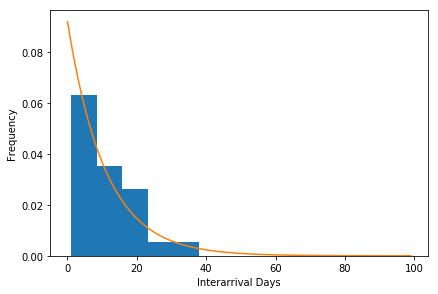

In [295]:
arrival_times = np.diff(local_extremum_indices)
lambda_hat = 1/np.mean(arrival_times)
print('%s = ' % chr(955), lambda_hat)
plt.hist(arrival_times, bins =5, density =True)
x = np.arange(100)
plt.plot(x, lambda_hat*np.exp(-lambda_hat*x))
plt.tight_layout()
plt.xlabel('Interarrival Days')
plt.ylabel('Frequency')

### Spike Magnitudes

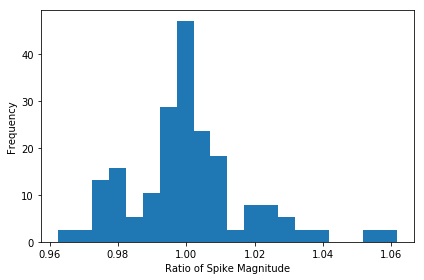

In [296]:
local_extrema = error_filtered[local_extremum_indices]
spike_magnitudes = local_extrema[1:]/local_extrema[:-1]
plt.hist(spike_magnitudes, bins=20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Ratio of Spike Magnitude')
plt.tight_layout()

maximum growth rate: 2.567651500667173 times standard deviation
3.119052688325233e-05 0.0011669980060804665


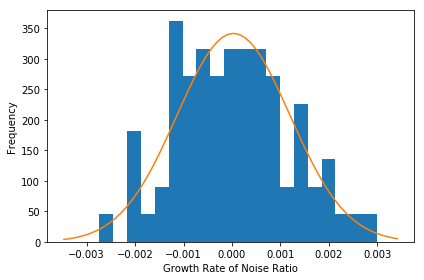

In [297]:
growth = np.log(spike_magnitudes)/arrival_times
mu_growth = np.mean(growth)
var_growth = np.var(growth)
std_growth = np.sqrt(var_growth)
plt.hist(growth, bins=20, density=True)
print('maximum growth rate: %s times standard deviation' % str(max(abs(growth))/std_growth))
range_factor = 3
x = np.arange(mu_growth - range_factor * std_growth, mu_growth +range_factor *std_growth, std_growth/10)
plt.plot(x, norm.pdf(x, loc=mu_growth, scale=std_growth))
plt.ylabel('Frequency')
plt.xlabel('Growth Rate of Noise Ratio')
plt.tight_layout()

print(mu_growth, std_growth)

# Random Generator Class for Network Adoption

In [298]:
def update_mean_ema(mu_p, x_n, alpha):
    return alpha * x_n + (1-alpha) * mu_p

"""
class PoissonWithExponentialJumpSignalGenerator:
    def __init__(self, slope_log=0.000381195119289848, intercept_log=0.6134434756157009, max_log_adoption=1.0, 
                 lambda_event=0.0919, mu_noise_log=3.12e-05, std_noise_log=0.001167,
                 max_noise_ratio_growth_rate = 2.57, rng_seed=None, 
                 return_contraction_threshold = None, return_contraction_ema_alpha = None, 
                 return_contraction_const = None
                ):
        self._rng = np.random.RandomState(seed=rng_seed)
        self._slope_log = slope_log
        self._intercept_log = intercept_log
        self._max_log_adoption = max_log_adoption
        self._start_noise_ratio = 1.0
        self._time_last_event = 0
        self._lambda_event = lambda_event
        self._time_next_event = int(np.random.exponential(scale = 1/self._lambda_event))
        self._direction = 1
        self._mu_noise_log = mu_noise_log
        self._std_noise_log = std_noise_log
        self._max_noise_ratio_growth_rate = max_noise_ratio_growth_rate
        self._noise_ratio_growth_rate = self._direction*abs(np.random.normal(loc=mu_noise_log, scale=std_noise_log))
        self._average_log_adoption = None
        self._adoption = None
        self._return_ema = 0.0
        self._adoption = math.exp(intercept_log)
        if (return_contraction_threshold is not None) or (return_contraction_ema_alpha is not None) or (return_contraction_ema_alpha is not None):
            assert return_contraction_threshold is not None, "missing value for return_contraction_threshold"
            assert return_contraction_ema_alpha is not None, "missing value for return_contraction_ema_alpha"
            assert return_contraction_const is not None, "missing value for return_contraction_threshold"
        self._return_contraction_threshold = return_contraction_threshold
        self._return_contraction_const = return_contraction_const
        self._return_contraction_ema_alpha = return_contraction_ema_alpha

    
    def _update_adoption(self):
        self._adoption = math.exp(self._noise_ratio * self._average_log_adoption)
        assert self._adoption >= 0, "adoption cannot be negative"
        
    def _update_average_adoption(self, time: float):
        x = self._slope_log * time + self._intercept_log
        self._average_log_adoption = min(x, self._max_log_adoption)
    
    def _update_noise_ratio(self, time: float):
        self._noise_ratio = self._start_noise_ratio*math.exp(self._noise_ratio_growth_rate*(time-self._time_last_event))
        print('noise_ratio_growth_rate = %s' % str(self._noise_ratio_growth_rate))
        print('noise_ratio = %s' % str(self._noise_ratio))
    
    def _update_event(self, time: float):
#         print('time = %s and time_from_last = %s' % (str(time),str(time-self._time_last_event)))
        if (time-self._time_last_event) >= self._time_next_event:
            t_tmp = self._time_next_event
            self._time_next_event = int(np.random.exponential(scale = 1/self._lambda_event))+1
            self._time_last_event = time
            self._direction *= -1
            self._start_noise_ratio = self._noise_ratio
            self._noise_ratio_growth_rate = self._direction*np.clip(abs(self._rng.normal(loc=self._mu_noise_log, \
                                                    scale=self._std_noise_log)), 0, \
                                                    self._max_noise_ratio_growth_rate*self._std_noise_log)
        if self._return_contraction_threshold is not None:
            # contraction
            if self._return_ema > self._return_contraction_threshold:
                _delta = self._return_ema - self._return_contraction_threshold
                print(f"compressing at time {time}: delta = ", _delta)
                self._noise_ratio_growth_rate -=  self._return_contraction_const * _delta**2
                print("_noise_ratio_growth_rate = ", self._noise_ratio_growth_rate)
            # print("t_next = %s" % str(self._time_next_event))
            if self._return_ema < - self._return_contraction_threshold:
                _delta = self._return_ema + self._return_contraction_threshold
                print(f"compressing at time {time}: delta = ", _delta)
                self._noise_ratio_growth_rate += self._return_contraction_const * _delta**2
                print("_noise_ratio_growth_rate = ", self._noise_ratio_growth_rate)
            # print("t_next = %s" % str(self._time_next_event))
    
    def update_adoption(self, time: float):
        prev_adoption = self._adoption 
        print('average_adoption before = %s at t = %s '% (str(self._average_log_adoption), str(time)))

        self._update_average_adoption(time)
        print('average_adoption after = %s' %str(self._average_log_adoption))

        self._update_noise_ratio(time)
        
        self._update_adoption()
        print('adoption = %s' %str(self._adoption))

        self._update_event(time)
        
        if self._return_contraction_ema_alpha is not None:
            _return = (self._adoption - prev_adoption) / prev_adoption
            self._return_ema = update_mean_ema(self._return_ema, _return, self._return_contraction_ema_alpha)
        print("return: ", self._return_ema)
        
        return self
        
    def get_signal(self):
        return self._adoption
    
"""
class PoissonWithExponentialJumpSignalGenerator:
    def __init__(self, slope_log=0.000381195119289848, intercept_log=0.6134434756157009, max_log_adoption=1.0, 
                 lambda_event=0.0919, mu_noise_log=3.12e-05, std_noise_log=0.001167,
                 max_noise_ratio_growth_rate = 2.57,
                 rng_seed=None,
                 return_contraction_threshold=None,
                 return_contraction_ema_alpha=None,
                 return_contraction_const=None
                 ):
        self._rng = np.random.RandomState(seed=rng_seed)
        self._slope_log = slope_log
        self._intercept_log = intercept_log
        self._max_log_adoption = max_log_adoption
        self._start_noise_ratio = 1.0
        self._time_last_event = 0
        self._lambda_event = lambda_event
        self._time_next_event = int(np.random.exponential(scale=1 / self._lambda_event))
        self._direction = 1
        self._mu_noise_log = mu_noise_log
        self._std_noise_log = std_noise_log
        self._max_noise_ratio_growth_rate = max_noise_ratio_growth_rate
        self._noise_ratio_growth_rate = self._direction * abs(np.random.normal(loc=mu_noise_log,scale=std_noise_log))
        self._average_log_adoption = None
        self._adoption = math.exp(intercept_log)
        self._adoption_last = math.exp(intercept_log)

        self._return_ema = 0.0
        self._adoption = math.exp(intercept_log)
        if (return_contraction_threshold is not None) or (return_contraction_ema_alpha is not None) or (return_contraction_ema_alpha is not None):
            assert return_contraction_threshold is not None,"missing value for return_contraction_threshold"
            assert return_contraction_ema_alpha is not None,"missing value for return_contraction_ema_alpha"
            assert return_contraction_const is not None,"missing value for return_contraction_threshold"
        self._return_contraction_threshold = return_contraction_threshold
        self._return_contraction_const = return_contraction_const
        self._return_contraction_ema_alpha = return_contraction_ema_alpha

    def _update_adoption(self):
        self._adoption = math.exp(self._noise_ratio * self._average_log_adoption)
        assert self._adoption >= 0, "adoption cannot be negative"

    def _update_log_baseline(self, step: float):
        x = self._slope_log * step + self._intercept_log
        self._average_log_adoption = min(x, self._max_log_adoption)

    def _apply_contraction(self):
        """
        Applies contractive force when exceeding limits, and provided limits are given.
        Force is proportional to squared distance from respective limit.
        """
        if self._return_contraction_threshold is not None:
            # contraction
            if self._return_ema > self._return_contraction_threshold:
                _delta = self._return_ema - self._return_contraction_threshold
                self._noise_ratio_growth_rate -= self._return_contraction_const * _delta ** 2
                return
            if self._return_ema < - self._return_contraction_threshold:
                _delta = self._return_ema + self._return_contraction_threshold
                self._noise_ratio_growth_rate += self._return_contraction_const * _delta ** 2

    def _update_noise_ratio(self, step: int):
        self._noise_ratio = self._start_noise_ratio * math.exp(self._noise_ratio_growth_rate * (step - self._time_last_event))

    def _update_event(self, step: int):
        if (step - self._time_last_event) >= self._time_next_event:
            self._time_next_event = int(np.random.exponential(scale=1 / self._lambda_event)) + 1
            # ToDo: predict noise ratio and don't let it drop beyond some point
            self._time_last_event = step
            self._direction *= -1
            self._start_noise_ratio = self._noise_ratio
            self._noise_ratio_growth_rate = self._direction * np.clip(abs(self._rng.normal(loc=self._mu_noise_log, 
                                                                                           scale=self._std_noise_log)),
                                                                      0, self._max_noise_ratio_growth_rate * self._std_noise_log)

    def update_adoption(self, step: int):
        self._adoption_last = self._adoption
        self._update_log_baseline(step)
        self._apply_contraction()
        self._update_noise_ratio(step)
        self._update_adoption()
        self._update_event(step)
        #
        if self._return_contraction_ema_alpha is not None:
            _return = (self._adoption - self._adoption_last) / self._adoption_last
            self._return_ema = update_mean_ema(self._return_ema,_return,self._return_contraction_ema_alpha)

        return self

    def get_signal(self):
        return self._adoption

    def get_signal_change(self):
        return self._adoption - self._adoption_last


     

In [299]:
syn_data_x = np.arange(2*int(np.max(X.values)) + 1)

N = 8
syn_data_y = []
for j in range(N):
    print(f"Starting run {j}\n=======================")
    gen = PoissonWithExponentialJumpSignalGenerator(rng_seed=np.random.randint(low=0, high=2**32-1))
    syn_data_y.append(np.array([gen.update_adoption(i).get_signal() for i in syn_data_x]))
    print("")
    
print(syn_data_y)

Starting run 0

Starting run 1

Starting run 2

Starting run 3

Starting run 4

Starting run 5

Starting run 6

Starting run 7

[array([1.8467798 , 1.84850746, 1.85023893, ..., 2.99374501, 2.99287749,
       2.99201044]), array([1.8467798 , 1.84860068, 1.85042585, ..., 3.17121058, 3.17118603,
       3.17116148]), array([1.8467798 , 1.84776882, 1.84875879, ..., 2.43159997, 2.43211768,
       2.43263563]), array([1.8467798 , 1.84905865, 1.85134445, ..., 3.81007662, 3.80958694,
       3.80909736]), array([1.8467798 , 1.84839694, 1.85001736, ..., 2.84831443, 2.85114538,
       2.85398183]), array([1.8467798 , 1.84797687, 1.84917553, ..., 2.60922634, 2.60817137,
       2.60711728]), array([1.8467798 , 1.8474975 , 1.8482155 , ..., 2.61247464, 2.60611051,
       2.59977799]), array([1.8467798 , 1.8480119 , 1.84924573, ..., 2.34179924, 2.33705063,
       2.33232294])]


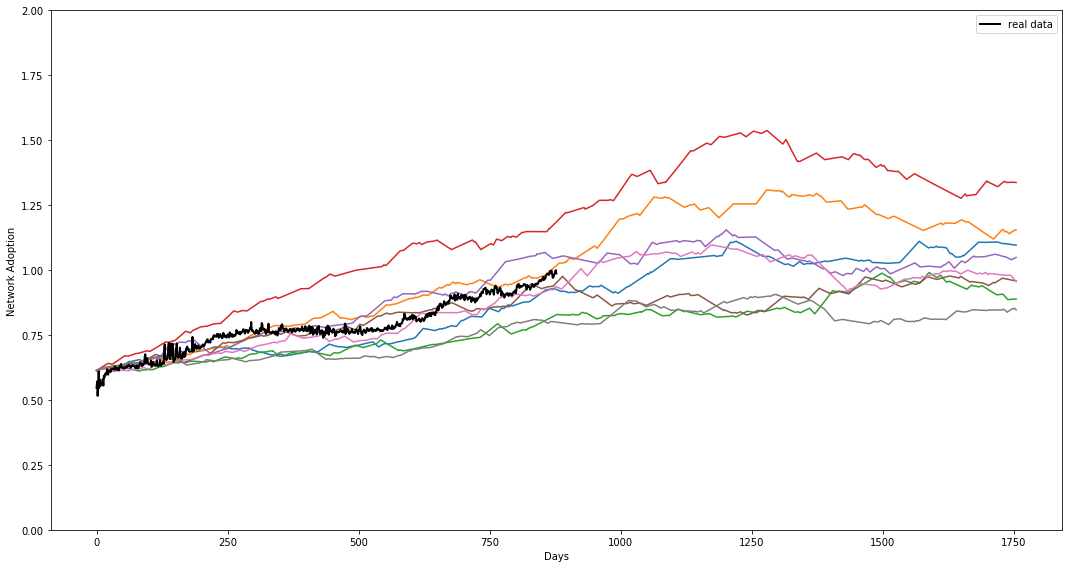

In [300]:
real_normalized_price = np.log(df_new[c].values)
real_normalized_price /= max(real_normalized_price)

plt.figure(figsize=(15,8));
for _r, _y in enumerate(syn_data_y):
    plt.plot(syn_data_x, np.log(_y))
plt.plot(X, real_normalized_price, label = 'real data', linewidth=2, color="black")
# plt.plot(min[X], max[X])
plt.xlabel('Days')
plt.ylabel('Network Adoption')
plt.legend()
plt.ylim(0, 2)
plt.tight_layout();

## Results
The following table show the paramaters of the random number generator class for both gas count and number of transactions:

| Data| Slope|Intercept|$\lambda$|$\mu$| $\sigma$| saturation limit |
|--------|----------|-------------|-------|-----------|-------|----|
|Gas count values|0.00024|0.770|0.10417|-4.83e-06|0.00115|3.1|
|N_transction values|0.00038|0.613|0.0919|3.12e-05|0.00117| 2.6|

# Mapping to a desired interval

In [301]:
slope_log = 0.000381195119289848
intercept_log = 0.6134434756157009
max_log_adoption=1.0

current_initial = math.exp(intercept_log)
current_saturation = math.exp(max_log_adoption)
# Saturation time x = self._slope_log * time + self._intercept_log
desired_initial = 0.0
desired_saturation = 1000.0

# slopes
slope_mapping = (desired_saturation - desired_initial) / (current_saturation - current_initial)
mapping = lambda x: np.maximum(0.0, np.random.normal(1.0, .3) *(slope_mapping * (x-current_initial) + desired_initial))


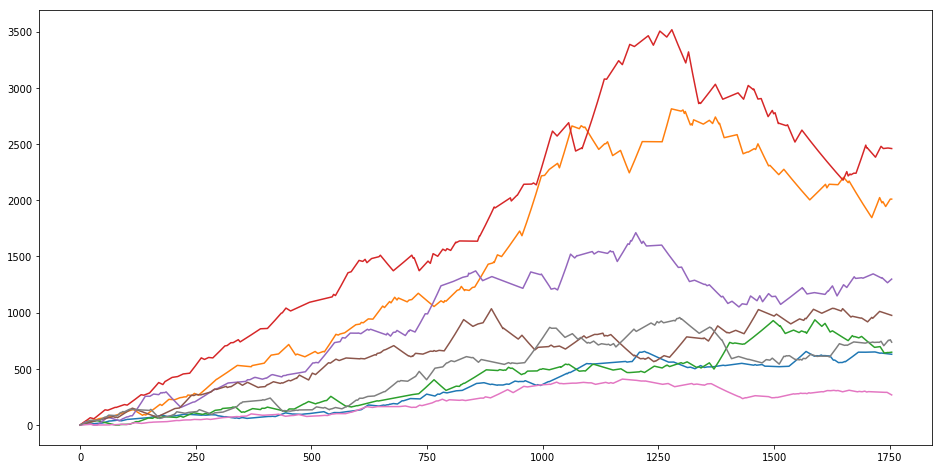

In [302]:
plt.figure(figsize=(16,8));
for _r, _y in enumerate(syn_data_y):
    plt.plot(syn_data_x, mapping(_y))

# Network Adoption for Consumers (Early Adopters and Laggards)

|behaviour type|time they join network|time to inflection|saturation budget as % of total|initial coins|
|--|--|--|--|--|
|Users|20% Early Adopters, t=1yrs|2yrs|13.5%|0, join later|
|Users|80% Laggards, t=6yrs|infinite|16%|0, join later|

In [303]:
intercept_log=0.6134434756157009
max_log_adoption=1.0
slope_log_early_adopters = (max_log_adoption - intercept_log)/((2-1)*365)  # (max_log - intercept_log)/desired_time
slope_log_laggards = (max_log_adoption - intercept_log)//((10-6)*365)
syn_data_x = np.arange(10*int(np.max(X.values)) + 1)

N = 10
syn_data_y_early_adopters = []
syn_data_y_laggards = []
for j in range(N):
    print(f"Starting run {j}\n=======================")
    gen_early_adopters = PoissonWithExponentialJumpSignalGenerator(slope_log=slope_log_early_adopters, rng_seed=np.random.randint(low=0, high=2**32))
    gen_laggards = PoissonWithExponentialJumpSignalGenerator(slope_log=slope_log_laggards, rng_seed=np.random.randint(low=0, high=2**32))
    syn_data_y_early_adopters.append(np.array([gen_early_adopters.update_adoption(i).get_signal() for i in syn_data_x]))
    syn_data_y_laggards.append(np.array([gen_laggards.update_adoption(i).get_signal() for i in syn_data_x]))

    print("")
    
print(syn_data_y_laggards)

Starting run 0

Starting run 1

Starting run 2

Starting run 3

Starting run 4

Starting run 5

Starting run 6

Starting run 7

Starting run 8

Starting run 9

[array([1.8467798 , 1.84699887, 1.84603741, ..., 2.41452249, 2.41655744,
       2.41859606]), array([1.8467798 , 1.84787033, 1.84896255, ..., 2.22840441, 2.22882828,
       2.22925233]), array([1.8467798 , 1.84653506, 1.8462904 , ..., 2.23404135, 2.23720108,
       2.24037083]), array([1.8467798 , 1.84691132, 1.84704286, ..., 1.81522017, 1.81377548,
       1.81233387]), array([1.8467798 , 1.84689886, 1.84701793, ..., 1.72404049, 1.72526191,
       1.72648578]), array([1.8467798 , 1.84704986, 1.84732002, ..., 1.48974554, 1.49017178,
       1.49059844]), array([1.8467798 , 1.84856994, 1.85036464, ..., 2.01534893, 2.01618096,
       2.01701382]), array([1.8467798 , 1.84729784, 1.84781625, ..., 1.58288474, 1.5836617 ,
       1.58443986]), array([1.8467798 , 1.8493214 , 1.85187221, ..., 2.16761813, 2.17042969,
       2.17038888]), ar

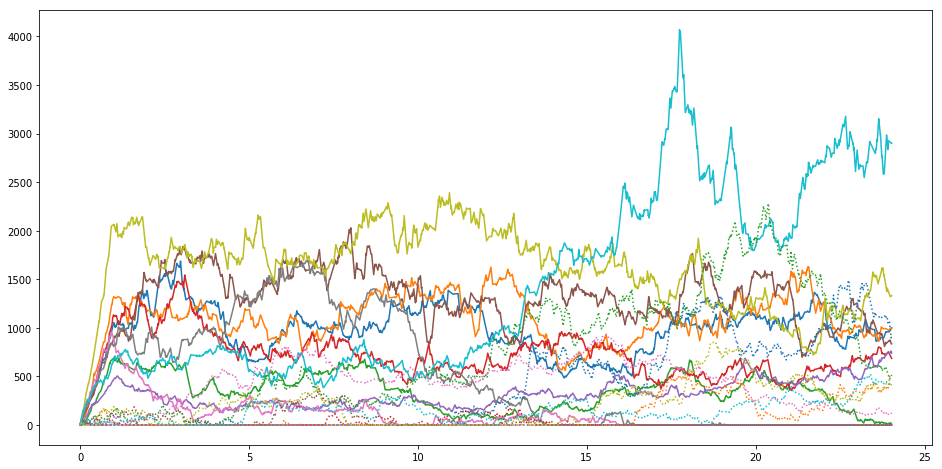

In [304]:
plt.figure(figsize=(16,8));
for _r, _y in enumerate(syn_data_y_early_adopters):
    plt.plot(syn_data_x/365, mapping(_y))
for _r, _y in enumerate(syn_data_y_laggards):
    plt.plot(syn_data_x/365, mapping(_y), linestyle=':')
    
# plt.ylim(0, 100)